<a href="https://colab.research.google.com/github/OtherMuqsith/Diffusion/blob/main/Diffusion_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pylab as plt
import re
import pandas as pd

In [17]:
daFile = open('test05.yaml', 'r')
lines = daFile.readlines()

widths = []
jobIDs = []
for line in lines: 
  # width 
  # "    d: 5.5"
  daSplit = re.split("^\s+d:\s+(\d+\.\d+)",line)

  if len(daSplit)>1:
    width = float( daSplit[1] )
    widths.append(width)


  # job number
  #job_id: "0002" 
  daSplit = re.split("^\s+job_id:\s+\"(\d+)\"",line)
  if len(daSplit)>1:
    id = daSplit[1] 
    jobIDs.append(id)

df = pd.read_csv("results.csv")
df['widths'] = widths

widths = np.asarray( df['widths'] )
Deff_slot = np.asarray( df['Deff_slot'] )


In [9]:
df

,Unnamed: 0,job_id,minsep,Deff_membrane,Deff_slot,phi_membrane,phi_slot,widths
0,0,1,1000.0,0.001863,0.007454,0.244220,0.976878,3.000000
1,1,2,1000.0,0.001907,0.007479,0.249270,0.977336,3.060606
2,2,3,1000.0,0.001952,0.007503,0.254321,0.977776,3.121212
3,3,4,1000.0,0.001992,0.007514,0.259371,0.978199,3.181818
4,4,5,1000.0,0.002034,0.007526,0.264422,0.978607,3.242424
...,...,...,...,...,...,...,...,...
95,95,96,1000.0,0.005739,0.007864,0.724018,0.992079,8.757576
96,96,97,1000.0,0.005784,0.007871,0.729068,0.992134,8.818182
97,97,98,1000.0,0.005825,0.007873,0.734119,0.992187,8.878788
98,98,99,1000.0,0.005859,0.007865,0.739169,0.992240,8.939394


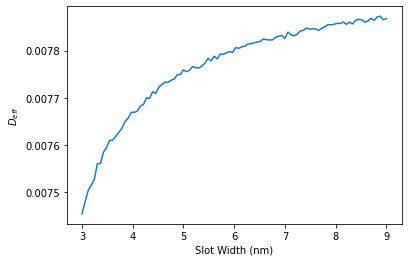

In [18]:
plt.xlabel("Slot Width (nm)")
plt.ylabel(r'$D_{eff}$')
plt.plot( widths, Deff_slot)

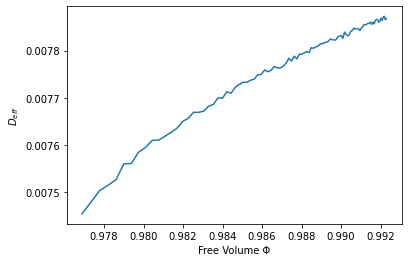

In [19]:
plt.xlabel("Free Volume \u03A6")
plt.ylabel(r'$D_{eff}$')
plt.plot( df['phi_slot'], df['Deff_slot'])

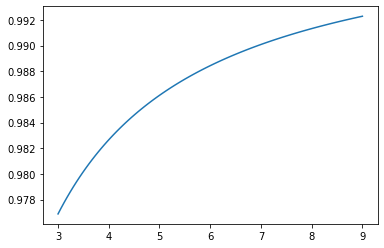

In [13]:
plt.plot( df['widths'], df['phi_slot'])